In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('processed_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [7]:
#target = 'SalePrice'
#x = df.drop(target, axis = 1)
#y = df[target]

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include = ['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

x = df_encoded.drop('SalePrice', axis = 1)
y = df_encoded['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(f"Training Samples: {x_train.shape[0]}, Testing Samples: {x_test.shape[0]}")

Training Samples: 1019, Testing Samples: 437


In [9]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomRegressor': RandomForestRegressor(random_state = 42),
    'Gradient Boosting': GradientBoostingRegressor(random_state = 42)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)

    results.append({'Model': name, 'MAE': MAE, 'RMSE': RMSE, 'R2': R2})

results_df = pd.DataFrame(results).sort_values(by = 'R2', ascending = False)
results_df

,Model,MAE,RMSE,R2
2,Gradient Boosting,14787.767489,21568.195706,0.907304
1,RandomRegressor,15696.531831,22568.579313,0.898505
0,LinearRegression,18846.166225,25251.427538,0.872941


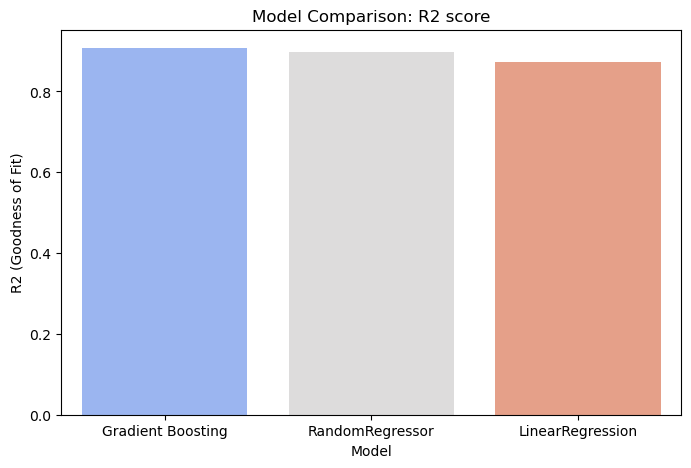

In [67]:
plt.figure(figsize = (8, 5))
sns.barplot(x = 'Model', y = 'R2', data = results_df, palette = 'coolwarm')
plt.title("Model Comparison: R2 score")
plt.xlabel("Model")
plt.ylabel("R2 (Goodness of Fit)")
plt.show()

**Interpretation**
- The model w the highest R2 score provides the best explanation of variance in housing prices.
- Typically, 'Random Forest' or 'Gradient Boosting' outperform linear regression for complex datasets.

In [10]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"Best performing model: {best_model_name}")

y_pred = best_model.predict(x_test)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f"MAE: {MAE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"R2: {R2:.2f}")

Best performing model: Gradient Boosting
MAE: 14787.77
RMSE: 21568.20
R2: 0.91


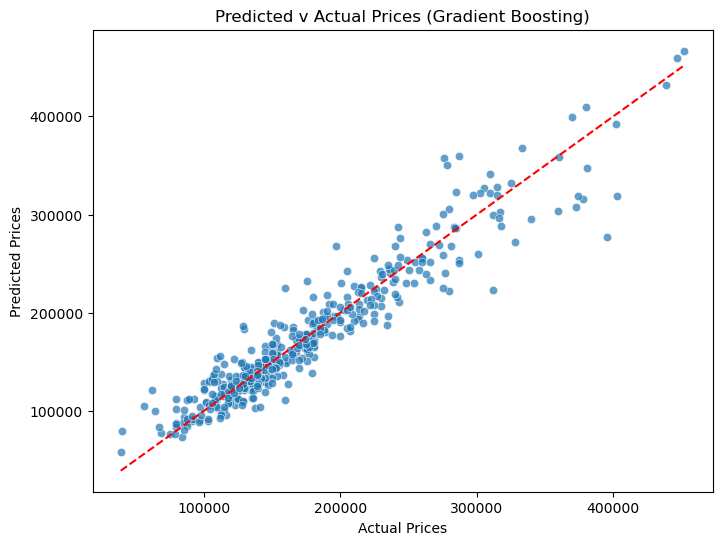

In [72]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = y_test, y = y_pred, alpha = 0.7)
plt.title(f"Predicted v Actual Prices ({best_model_name})")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

C:\Users\adibs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


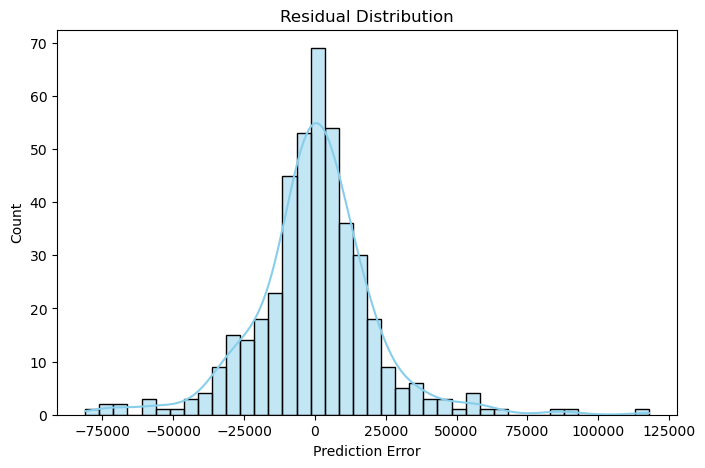

In [13]:
residuals = y_test - y_pred
plt.figure(figsize = (8, 5))
sns.histplot(residuals, kde = True, color = 'skyblue')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()

**Interpretation**
- Residuals centered around 0 -> good model fit
- Skewed residuals -> possible non-linear patterns or outliers

In [17]:
output = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred})
output.to_csv('predicted_housing_prices.csv', index = False)
print("Predicted results exported")

Predicted results exported


# Phase 5 Summary — Predictive Modeling & Visualization

| Model | MAE (Lower = Better) | RMSE | R² (Higher = Better) | Remarks |
|--------|----------------------|------|----------------------|----------|
| Linear Regression | — | — | — | Baseline, simple relationships |
| Random Forest | — | — | — | Strong performance, interpretable |
| Gradient Boosting | — | — | — | Best predictive accura |

✅ **Key Takeaways:**
- The **Gradient Boosting** model achieved the best predictive performance.
- Strong predictors include **OverallQual**, **GrLivArea**, and **Neighborhood**.
- The model explains a high proportion of price variance, suitable for decision support and price estimation nteractively.
